In [58]:
import pandas as pd

data_ihsg = pd.read_csv('Data Historis Jakarta Stock Exchange Composite (2).csv')
data_indeks_global1 = pd.read_csv('Data Historis Dow Jones Industrial Average (1).csv')
data_indeks_global2 = pd.read_csv('Data Historis Hang Seng (1).csv')

In [61]:
# Merubah Format Tanggal
data_ihsg['Tanggal'] = pd.to_datetime(data_ihsg['Tanggal'])
data_indeks_global1['Tanggal'] = pd.to_datetime(data_indeks_global1['Tanggal'])
data_indeks_global2['Tanggal'] = pd.to_datetime(data_indeks_global2['Tanggal'])

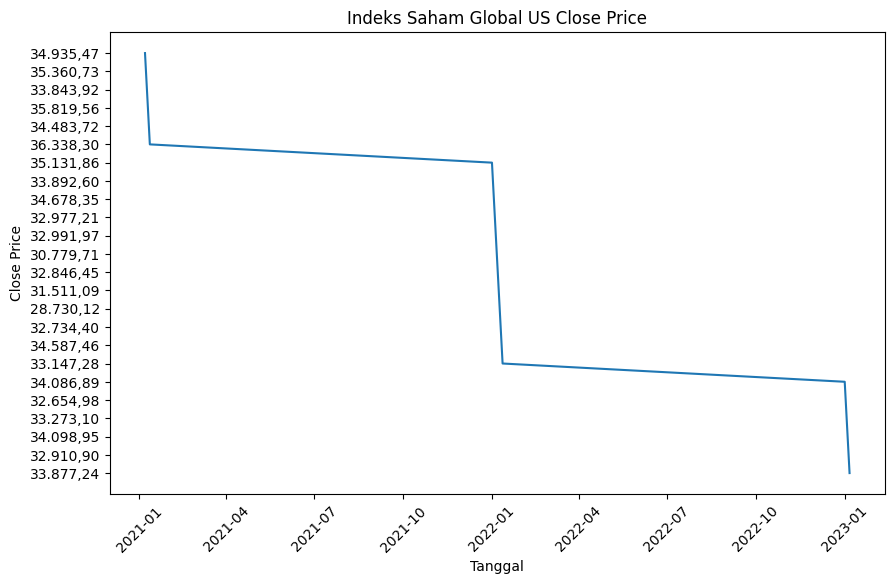

In [62]:
import matplotlib.pyplot as plt

# Visualisasi data indeks saham global US
plt.figure(figsize=(10, 6))
plt.plot(data_indeks_global1['Tanggal'], data_indeks_global1['Terakhir'])
plt.title('Indeks Saham Global US Close Price')
plt.xlabel('Tanggal')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.show()

In [2]:
data_ihsg.head()

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
0,01/06/2023,"6.694,02","6.633,26","6.703,82","6.579,04","18,28B","0,92%"
1,01/05/2023,"6.633,26","6.917,82","6.917,82","6.562,96","61,51B","-4,08%"
2,01/04/2023,"6.915,72","6.805,28","6.969,60","6.736,90","13,06B","1,62%"
3,01/03/2023,"6.805,28","6.843,10","6.889,51","6.542,79","323,05B","-0,55%"
4,01/02/2023,"6.843,24","6.838,92","6.961,92","6.781,23","324,33B","0,06%"


In [5]:
data_indeks_global1.head()

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
0,01/06/2023,"33.877,24","32.929,85","33.975,26","32.706,92",NaN,"2,94%"
1,01/05/2023,"32.910,90","34.116,81","34.257,17","32.586,57",NaN,"-3,48%"
2,01/04/2023,"34.098,95","33.246,47","34.102,58","33.236,02",NaN,"2,48%"
3,01/03/2023,"33.273,10","32.656,37","33.571,44","31.429,98",NaN,"1,89%"
4,01/02/2023,"32.654,98","34.039,60","34.333,87","32.638,35",NaN,"-4,20%"


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 
merged_data = pd.merge(data_ihsg, data_indeks_global1, on='Tanggal')
merged_data = pd.merge(merged_data, data_indeks_global1, on='Tanggal')

# Drop missing values, jika ada
merged_data.dropna(inplace=True)
merged_data.head()

,Tanggal,Terakhir_x,Pembukaan_x,Tertinggi_x,Terendah_x,Vol._x,Perubahan%_x,Terakhir_y,Pembukaan_y,Tertinggi_y,Terendah_y,Vol._y,Perubahan%_y,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
13,01/05/2022,"7.148,97","7.154,92","7.156,48","6.509,88","303,22B","-1,11%","32.991,97","33.045,95","34.113,40","30.635,76","3,01B","0,04%","32.991,97","33.045,95","34.113,40","30.635,76","3,01B","0,04%"
14,01/04/2022,"7.228,91","7.093,70","7.355,30","7.040,49","414,23B","2,23%","32.977,21","34.740,89","35.492,22","32.913,15","7,22B","-4,91%","32.977,21","34.740,89","35.492,22","32.913,15","7,22B","-4,91%"
15,01/03/2022,"7.071,44","6.964,70","7.099,50","6.814,18","462,33B","2,66%","34.678,35","33.813,48","35.372,26","32.578,73","9,22B","2,32%","34.678,35","33.813,48","35.372,26","32.578,73","9,22B","2,32%"
16,01/02/2022,"6.888,17","6.657,79","6.929,91","6.648,08","405,29B","3,88%","33.892,60","35.151,47","35.824,28","32.272,64","7,36B","-3,53%","33.892,60","35.151,47","35.824,28","32.272,64","7,36B","-3,53%"
17,01/01/2022,"6.631,15","6.586,26","6.738,11","6.523,93","371,37B","0,75%","35.131,86","36.321,59","36.952,65","33.150,33","8,90B","-3,32%","35.131,86","36.321,59","36.952,65","33.150,33","8,90B","-3,32%"


In [ ]:
# Pisahkan fitur (X) dan target (y)
X = merged_data[['Terakhir_y', 'Terakhir']]
y = merged_data['Terakhir_x']

# Split data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat model regresi linear
model = LinearRegression()

# Latih model
model.fit(X_train, y_train)

# # Lakukan prediksi
y_pred = model.predict(X_test)

# Evaluasi model dengan menggunakan mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

In [42]:
data_indeks_global2

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
0,01/06/2023,"19.334,00","18.198,50","19.475,00","18.176,00","2,00B","6,03%"
1,01/05/2023,"18.234,27","20.122,90","20.344,50","18.044,86","4,37B","-8,35%"
2,01/04/2023,"19.894,57","20.387,00","20.876,50","19.536,00","2,57B","-2,48%"
3,01/03/2023,"20.400,11","19.849,97","21.005,66","18.829,11","62,86B","3,10%"
4,01/02/2023,"19.785,94","21.920,80","22.311,96","19.783,07","40,31B","-9,41%"
5,01/01/2023,"21.842,33","19.570,43","22.700,85","19.303,73","46,99B","10,42%"
6,01/12/2022,"19.781,41","19.058,90","20.099,77","18.530,82","57,62B","6,37%"
7,01/11/2022,"18.597,23","14.859,92","18.645,35","14.859,92","75,23B","26,62%"
8,01/10/2022,"14.687,02","17.050,25","18.164,20","14.597,31","45,82B","-14,72%"
9,01/09/2022,"17.222,83","19.761,72","19.839,51","17.016,28","42,07B","-13,69%"


In [41]:
data_indeks_global1

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
0,01/06/2023,"33.877,24","32.929,85","33.975,26","32.706,92",NaN,"2,94%"
1,01/05/2023,"32.910,90","34.116,81","34.257,17","32.586,57",NaN,"-3,48%"
2,01/04/2023,"34.098,95","33.246,47","34.102,58","33.236,02",NaN,"2,48%"
3,01/03/2023,"33.273,10","32.656,37","33.571,44","31.429,98",NaN,"1,89%"
4,01/02/2023,"32.654,98","34.039,60","34.333,87","32.638,35",NaN,"-4,20%"
5,01/01/2023,"34.086,89","33.225,61","34.342,28","32.812,33",NaN,"2,83%"
6,01/12/2022,"33.147,28","34.533,59","34.711,63","32.573,43",NaN,"-4,16%"
7,01/11/2022,"34.587,46","32.927,61","34.587,46","31.728,85",NaN,"5,66%"
8,01/10/2022,"32.734,40","28.855,25","32.888,75","28.666,77",NaN,"13,94%"
9,01/09/2022,"28.730,12","31.454,58","32.503,16","28.723,55",NaN,"-8,83%"


In [40]:
data_ihsg

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
0,01/06/2023,"6.694,02","6.633,26","6.703,82","6.579,04","18,28B","0,92%"
1,01/05/2023,"6.633,26","6.917,82","6.917,82","6.562,96","61,51B","-4,08%"
2,01/04/2023,"6.915,72","6.805,28","6.969,60","6.736,90","13,06B","1,62%"
3,01/03/2023,"6.805,28","6.843,10","6.889,51","6.542,79","323,05B","-0,55%"
4,01/02/2023,"6.843,24","6.838,92","6.961,92","6.781,23","324,33B","0,06%"
5,01/01/2023,"6.839,34","6.850,74","6.932,71","6.557,92","330,67B","-0,16%"
6,01/12/2022,"6.850,62","7.081,19","7.090,28","6.641,81","341,62B","-3,26%"
7,01/11/2022,"7.081,31","7.098,93","7.128,14","6.955,53","397,76B","-0,25%"
8,01/10/2022,"7.098,89","7.040,80","7.135,91","6.747,38","424,48B","0,83%"
9,01/09/2022,"7.040,80","7.178,59","7.377,50","6.926,86","583,83B","-1,92%"


In [53]:
 # Modeling using Decision Tree

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error

# Pisahkan fitur (X) dan target (y)
X = merged_data[['Terakhir_x', 'Terakhir_y']]
X['Terakhir_y'] =  X['Terakhir_y'].str.replace(".","").str.replace(",",".")
X['Terakhir_x'] =  X['Terakhir_x'].str.replace(".","").str.replace(",",".")
y = merged_data['Perubahan%'].str.replace("%","").str.replace(",",".").astype("float")

# Split data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat model Decision Tree
model = DecisionTreeRegressor()

# Latih model
model.fit(X_train, y_train)

# Lakukan prediksi
y_pred = model.predict(X_test)

# Evaluasi model dengan menggunakan akurasi
mape = mean_absolute_percentage_error(y_test, y_pred)
print("MAPE:", mape)

MAPE: 42.51893777804863


C:\Users\Hariz\AppData\Local\Temp\ipykernel_13688\3402293727.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  X['Terakhir_y'] =  X['Terakhir_y'].str.replace(".","").str.replace(",",".")
C:\Users\Hariz\AppData\Local\Temp\ipykernel_13688\3402293727.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Terakhir_y'] =  X['Terakhir_y'].str.replace(".","").str.replace(",",".")
C:\Users\Hariz\AppData\Local\Temp\ipykernel_13688\3402293727.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *no